In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b17419eada9138d985b6ea2fa66d83eb


In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lazaro cardenas
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | tiarei
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | logan lake
Processing Record 9 of Set 1 | ahuimanu
Processing Record 10 of Set 1 | kaduna
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | dingle
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | bilma
Processing Record 21 of Set 1 | redlands
Processing Record 22 of Set 1 | salalah
Processing Record 

City not found. Skipping...
Processing Record 38 of Set 4 | high level
Processing Record 39 of Set 4 | crab hill
City not found. Skipping...
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | duderstadt
Processing Record 42 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 43 of Set 4 | maniitsoq
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | muzhi
Processing Record 46 of Set 4 | thunder bay
Processing Record 47 of Set 4 | libertador general san martin
Processing Record 48 of Set 4 | veracruz
Processing Record 49 of Set 4 | rocha
Processing Record 50 of Set 4 | kimbe
Processing Record 1 of Set 5 | itaituba
Processing Record 2 of Set 5 | gamboula
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | pasni
Processing Record 5 of Set 5 | rani
Processing Record 6 of Set 5 | pithiviers
Processing Record 7 of Set 5 | uwayl
City not found. Skipping...
Processing Record 8 of Set 5 | nuuk
Proces

Processing Record 25 of Set 8 | ambanja
Processing Record 26 of Set 8 | elko
Processing Record 27 of Set 8 | honiara
Processing Record 28 of Set 8 | halalo
City not found. Skipping...
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | brandenburg
Processing Record 31 of Set 8 | la palma
Processing Record 32 of Set 8 | shizunai
Processing Record 33 of Set 8 | carballo
Processing Record 34 of Set 8 | pinheiro machado
Processing Record 35 of Set 8 | mantua
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | mount isa
Processing Record 38 of Set 8 | eureka
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 41 of Set 8 | hongjiang
Processing Record 42 of Set 8 | opuwo
Processing Record 43 of Set 8 | verkhoyansk
Processing Record 44 of Set 8 | san policarpo
Processing Record 45 of Set 8 | inirida
Processing Record 46 of Set 8 | saldanha
Processing Record 4

Processing Record 13 of Set 12 | namatanai
Processing Record 14 of Set 12 | alihe
Processing Record 15 of Set 12 | marshall
Processing Record 16 of Set 12 | kot addu
Processing Record 17 of Set 12 | neiafu
Processing Record 18 of Set 12 | alekseyevsk
Processing Record 19 of Set 12 | novyy urengoy
Processing Record 20 of Set 12 | huarmey
Processing Record 21 of Set 12 | calama
Processing Record 22 of Set 12 | presidencia roque saenz pena
Processing Record 23 of Set 12 | itarema
Processing Record 24 of Set 12 | caucaia
Processing Record 25 of Set 12 | neuquen
Processing Record 26 of Set 12 | plainview
Processing Record 27 of Set 12 | kasongo-lunda
Processing Record 28 of Set 12 | san luis
Processing Record 29 of Set 12 | oktyabrskiy
Processing Record 30 of Set 12 | nhulunbuy
Processing Record 31 of Set 12 | vestmannaeyjar
Processing Record 32 of Set 12 | edson
Processing Record 33 of Set 12 | fuerte olimpo
Processing Record 34 of Set 12 | pochutla
Processing Record 35 of Set 12 | north p

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lazaro Cardenas,17.96,-102.20,71.82,88,8,2.28,MX,2020-02-24 06:40:34
1,Albany,42.60,-73.97,34.00,75,1,5.82,US,2020-02-24 06:42:43
2,Port Elizabeth,-33.92,25.57,68.00,64,11,2.24,ZA,2020-02-24 06:42:43
3,Tiarei,-17.53,-149.33,82.00,78,40,4.70,PF,2020-02-24 06:42:44
4,Rikitea,-23.12,-134.97,79.81,71,7,6.71,PF,2020-02-24 06:42:44
5,Kapaa,22.08,-159.32,75.20,69,40,5.82,US,2020-02-24 06:42:44
6,Logan Lake,50.50,-120.80,37.40,97,90,6.93,CA,2020-02-24 06:42:44
7,Ahuimanu,21.44,-157.84,75.20,69,20,8.05,US,2020-02-24 06:42:45
8,Kaduna,10.52,7.44,69.24,18,0,14.41,NG,2020-02-24 06:40:06
9,Busselton,-33.65,115.33,75.00,39,99,13.78,AU,2020-02-24 06:42:45


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lazaro Cardenas,MX,2020-02-24 06:40:34,17.96,-102.20,71.82,88,8,2.28
1,Albany,US,2020-02-24 06:42:43,42.60,-73.97,34.00,75,1,5.82
2,Port Elizabeth,ZA,2020-02-24 06:42:43,-33.92,25.57,68.00,64,11,2.24
3,Tiarei,PF,2020-02-24 06:42:44,-17.53,-149.33,82.00,78,40,4.70
4,Rikitea,PF,2020-02-24 06:42:44,-23.12,-134.97,79.81,71,7,6.71
5,Kapaa,US,2020-02-24 06:42:44,22.08,-159.32,75.20,69,40,5.82
6,Logan Lake,CA,2020-02-24 06:42:44,50.50,-120.80,37.40,97,90,6.93
7,Ahuimanu,US,2020-02-24 06:42:45,21.44,-157.84,75.20,69,20,8.05
8,Kaduna,NG,2020-02-24 06:40:06,10.52,7.44,69.24,18,0,14.41
9,Busselton,AU,2020-02-24 06:42:45,-33.65,115.33,75.00,39,99,13.78


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/23/20'

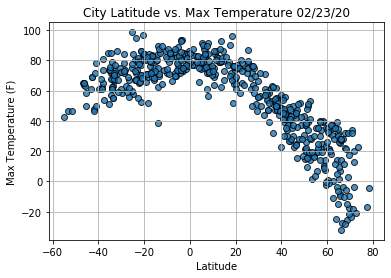

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

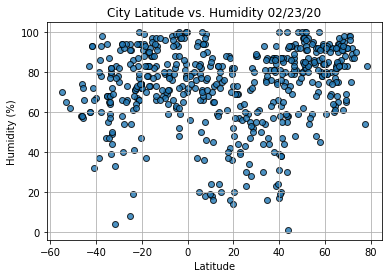

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

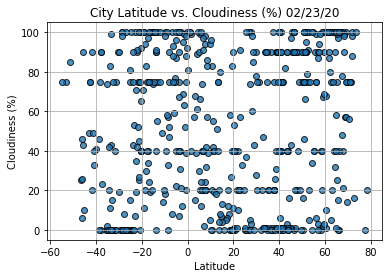

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

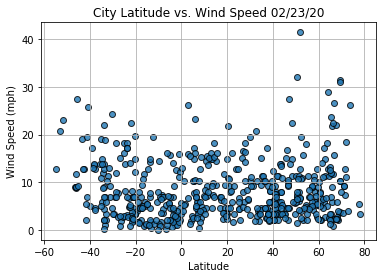

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2020-02-24 06:42:46
Lat                         -54.8
Lng                         -68.3
Max Temp                     42.8
Humidity                       70
Cloudiness                     75
Wind Speed                  12.75
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >=0

0       True
1       True
2      False
3      False
4      False
       ...  
534    False
535     True
536     True
537     True
538    False
Name: Lat, Length: 539, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lazaro Cardenas,MX,2020-02-24 06:40:34,17.96,-102.20,71.82,88,8,2.28
1,Albany,US,2020-02-24 06:42:43,42.60,-73.97,34.00,75,1,5.82
5,Kapaa,US,2020-02-24 06:42:44,22.08,-159.32,75.20,69,40,5.82
6,Logan Lake,CA,2020-02-24 06:42:44,50.50,-120.80,37.40,97,90,6.93
7,Ahuimanu,US,2020-02-24 06:42:45,21.44,-157.84,75.20,69,20,8.05


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

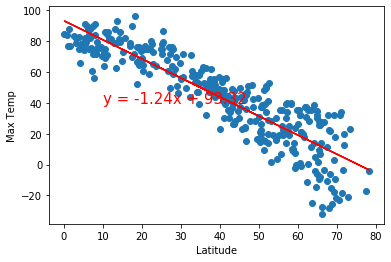

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Max Temp', text_coordinates=(10,40))

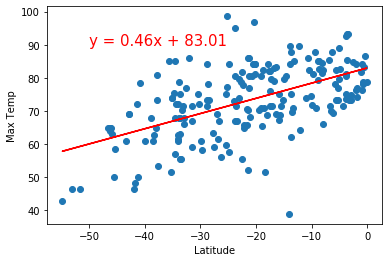

In [30]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

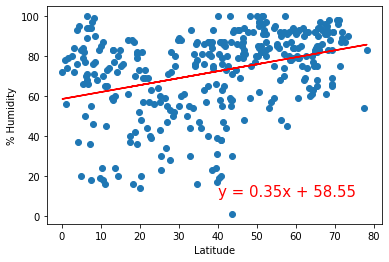

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

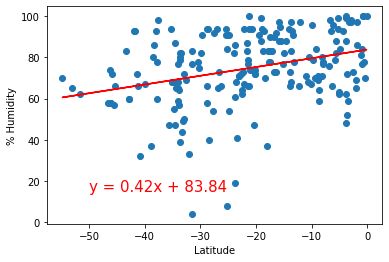

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

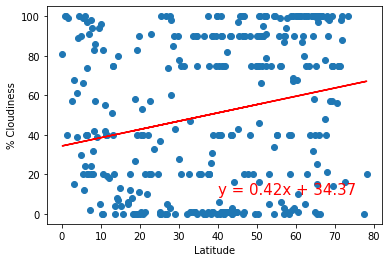

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

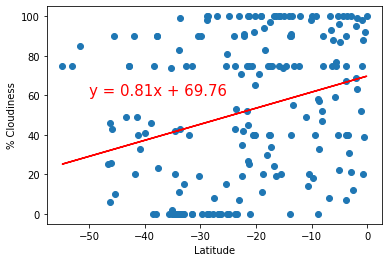

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

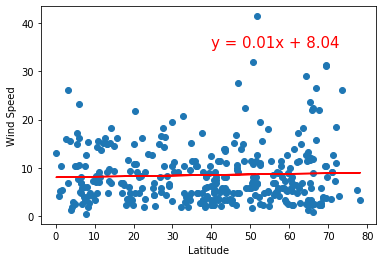

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

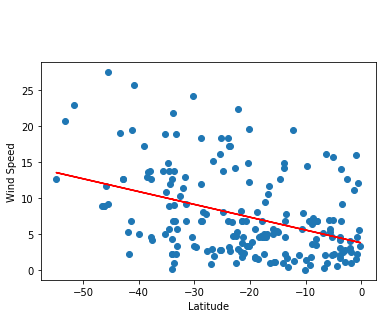

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))